<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

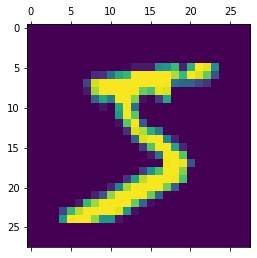

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2708 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1191 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0843 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0633 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0503 - accuracy: 0.9843


In [ ]:
#%load_ext tensorboard
 %tensorboard --logdir /content/logs/train

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [14]:
model.get_weights()

[array([[-0.0787182 , -0.02383338, -0.02597477, ...,  0.03302187,
          0.00632665, -0.00459248],
        [ 0.0394972 ,  0.00947156,  0.02137674, ..., -0.00989983,
          0.08062336,  0.02440741],
        [-0.02100499, -0.02407162,  0.05614536, ...,  0.07258436,
          0.06613067,  0.02081814],
        ...,
        [ 0.06212346, -0.01161112,  0.06936754, ...,  0.03193384,
         -0.06466831,  0.03248845],
        [ 0.01241352,  0.06533527, -0.00126009, ...,  0.0798068 ,
         -0.07185711, -0.07517691],
        [ 0.04934613, -0.00948744,  0.07986651, ...,  0.0502152 ,
         -0.00333874, -0.0731476 ]], dtype=float32),
 array([ 0.01199437,  0.07614073,  0.00063767, -0.07834134,  0.00699922,
         0.19127902, -0.01809384,  0.01648058,  0.22823578, -0.05945256,
         0.03516801, -0.03843931, -0.05873743,  0.13976026, -0.02366784,
         0.03554199, -0.11718153,  0.03917583, -0.07267866,  0.0792578 ,
         0.09603225, -0.07190827,  0.0395885 , -0.09370188,  0.150